In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yap15-heart-diseases-predictions/sample_submission.csv
/kaggle/input/yap15-heart-diseases-predictions/train.csv
/kaggle/input/yap15-heart-diseases-predictions/test.csv


## 1.Открываем файлы

In [18]:
from sklearn.pipeline import Pipeline
###Масштабирование###
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
####Модели####
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
os.chdir("/kaggle/input/yap15-heart-diseases-predictions/")
features_test = pd.read_csv('test.csv')
features_train = pd.read_csv('train.csv')

display(features_test)
display(features_train)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,21722,2,170,103.0,150,90,1,1,0,1,0
29996,99987,18309,1,172,78.0,110,70,1,1,0,0,1
29997,99989,21247,2,169,61.0,120,80,1,1,0,0,0
29998,99994,14509,2,175,80.0,120,80,2,1,0,0,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 2.

In [20]:

id_train = features_train['id']
id_test = features_test['id']

#############################
features_train = features_train[features_train['ap_hi']!=309]
# features_train = features_train[features_train['age']>8865]


#######
target_train = features_train['cardio']
features_train = features_train.drop(columns = ['id', 'cardio'])
display(features_train)

features_test = features_test.drop(columns = 'id')

display(features_train, features_test)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18888,1,154,85.0,130,80,1,1,0,0,1
1,19042,2,170,69.0,130,90,1,1,0,0,1
2,20432,1,160,70.0,120,75,1,1,0,0,0
3,18133,2,185,94.0,130,90,1,1,0,0,1
4,16093,2,170,76.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
29995,21722,2,170,103.0,150,90,1,1,0,1,0
29996,18309,1,172,78.0,110,70,1,1,0,0,1
29997,21247,2,169,61.0,120,80,1,1,0,0,0
29998,14509,2,175,80.0,120,80,2,1,0,0,0


## 3.Анализ данных

In [21]:
features = [features_train , features_test]
print(f'Процент класса 1 по целевому признаку в тренировочном датасете: {target_train.sum()/target_train.count():.3%}')

Процент класса 1 по целевому признаку в тренировочном датасете: 49.971%


In [22]:

def correction(ap):
    
    if ap < 0:
        if ap > -10:
            ap = ap*(-10)
        else: ap = ap*(-1)
    if ap >= 500:
        if ap > 4000:
            ap = ap/100
        else: ap = ap/10
    if ap > 0 and ap < 20:
        ap = ap*10
        
    return ap
features_train['ap_hi'] = features_train['ap_hi'].apply(correction)
features_train['ap_lo'] = features_train['ap_lo'].apply(correction)
features_test['ap_hi'] = features_test['ap_hi'].apply(correction)
features_test['ap_lo'] = features_test['ap_lo'].apply(correction)

display(features_test['ap_hi'].unique())
display(features_test['ap_lo'].unique())

array([130.  , 120.  , 110.  , 180.  , 100.  , 118.  , 150.  , 140.  ,
       200.  , 160.  ,  90.  , 145.  , 135.  , 170.  , 119.  , 400.  ,
       165.  , 115.  , 132.  , 155.  , 129.  , 190.  ,  80.  , 127.  ,
       136.  ,  95.  , 125.  , 156.  , 105.  , 123.  , 126.  , 141.  ,
       103.  , 143.  , 122.  , 109.  , 128.  , 175.  , 134.  ,  90.7 ,
       220.  ,  10.  , 174.  , 101.  , 133.  ,  98.  , 182.  , 158.  ,
       116.  , 117.  , 113.  , 144.  , 185.  ,  20.  , 168.  , 147.  ,
       163.  , 106.  , 198.  , 151.  , 152.  , 172.  ,  91.  , 131.  ,
        85.  , 121.  , 210.  , 137.  , 120.08, 153.  , 162.  , 112.  ,
        95.7 , 159.  , 157.  ,  90.6 , 104.  , 166.  , 140.2 , 148.  ,
        96.  ,  60.  , 160.2 , 139.  , 142.  ,  99.  , 124.  ,  70.  ,
       161.  , 150.2 , 149.  , 107.  , 138.  , 178.  , 108.  , 111.  ,
       176.  , 240.  , 102.  , 230.  , 154.  , 164.  , 140.7 , 188.  ,
       171.  , 160.8 , 169.  ,  50.9 , 213.  , 177.  , 114.  , 195.  ,
      

array([ 80.  ,  90.  ,  75.  ,  70.  , 100.  , 110.  ,  85.  ,  79.  ,
        60.  ,  86.  ,  72.  ,  71.  , 102.  ,  89.  , 130.  ,  82.  ,
       111.  ,  88.  ,  95.  ,  98.  ,  78.  ,  91.  ,  99.  ,  83.  ,
       160.  ,  40.  ,  66.  , 150.  ,  73.  ,  94.  ,  97.  ,  92.  ,
        84.  ,  81.  ,  30.  , 113.  , 120.  , 109.9 ,  65.  ,  69.  ,
        87.  ,  96.  ,  77.  ,  93.  ,  41.  ,  50.  , 105.  , 107.  ,
       101.  ,  67.  , 124.  ,  62.  ,  68.  ,  61.  , 140.  ,  76.  ,
        74.  , 112.  ,  20.  , 190.  ,  80.8 ,  59.  , 170.  , 100.3 ,
       104.  ,   0.  , 109.  ,  56.  ,  52.  ,  64.  ,  80.99,  47.  ,
       116.  , 103.  , 208.8 ,  80.1 ,  70.8 , 115.  , 101.1 , 122.  ,
       100.4 ,  70.1 , 100.1 ,  58.  ,  80.22,  80.9 , 106.6 ,  54.  ,
        63.  ,  44.  ,  55.  ,  49.  , 110.1 ,  57.  , 100.9 ])

In [23]:
# display(features_test['age'].max())
# display(features_test['age'].min())
# display(features_test['height'].max())
# display(features_test['height'].min())
# display(features_test['weight'].max())
# display(features_test['weight'].min())
# 15187(259)
display(features_test[features_test['age'] == 15187])
def height(h):
    if h <100:
        h = h+100
    return h
features_test['height'] = features_test['height'].apply(height)
features_train['height'] = features_train['height'].apply(height)

def weight(row):
    height=row['height']
    weight=row['weight']
    if weight < 46:
        weight = features_train['weight'][features_train['height'] == height].median()     
    return weight

features_test['weight'] = features_test.apply(weight, axis = 1)
features_train['weight'] = features_train.apply(weight, axis = 1)

display(features_test[features_test['age'] == 15187])
median = features_test['weight'].median()

features_test['weight'] = features_test['weight'].fillna(median)
features_train['weight'] = features_train['weight'].fillna(median)

def height(row):
    height=row['height']
    weight=row['weight']
    if height < 140:
        height = features_train['height'][features_train['weight'] == weight].median()     
    return height

features_test['height'] = features_test.apply(height, axis = 1)
features_train['height'] = features_train.apply(height, axis = 1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
259,15187,2,183,13.0,120.0,80.0,1,1,0,1,1
8392,15187,2,173,89.0,120.0,80.0,2,3,1,0,1
19043,15187,2,177,110.0,120.0,80.0,1,1,1,0,1
23671,15187,2,180,83.0,110.0,80.0,1,1,0,0,1


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
259,15187,2,183,89.0,120.0,80.0,1,1,0,1,1
8392,15187,2,173,89.0,120.0,80.0,2,3,1,0,1
19043,15187,2,177,110.0,120.0,80.0,1,1,1,0,1
23671,15187,2,180,83.0,110.0,80.0,1,1,0,0,1


In [24]:
def cor2lo(row):
    if row['ap_lo'] == 0:
        row['ap_lo'] = features_train['ap_lo'][features_train['ap_hi'] == row['ap_hi']].median()
    if row['ap_hi'] == 50.9:
        row['ap_lo'] = features_train['ap_lo'][features_train['ap_hi'] == 60].median()
    if row['ap_hi'] == 90.6:
        row['ap_lo'] = features_train['ap_lo'][features_train['ap_hi'] == 90].median()
    return row

features_test = features_test.apply(cor2lo,axis=1)

def cor2lotr(row):
    if row['ap_lo'] == 0:
        row['ap_lo'] = features_train['ap_lo'][features_train['ap_hi'] == round(row['ap_hi'])].median()
    if row['ap_hi'] == 90.6:
        row['ap_lo'] = features_train['ap_lo'][features_train['ap_hi'] == 90].median()
    if row['ap_hi'] == 90.7:
        row['ap_lo'] = features_train['ap_lo'][features_train['ap_hi'] == 90].median()
    if row['ap_hi'] == 80.6:
        row['ap_lo'] = features_train['ap_lo'][features_train['ap_hi'] == 80].median()
    return row
features_train=features_train.apply(cor2lotr, axis = 1)

def cor(row):
    if (row['ap_hi']-row['ap_lo'])<0:
        row['ap_hi'], row['ap_lo'] = row['ap_lo'],row['ap_hi']
    return row
        
features_test = features_test.apply(cor, axis = 1)
features_train = features_train.apply(cor, axis = 1)

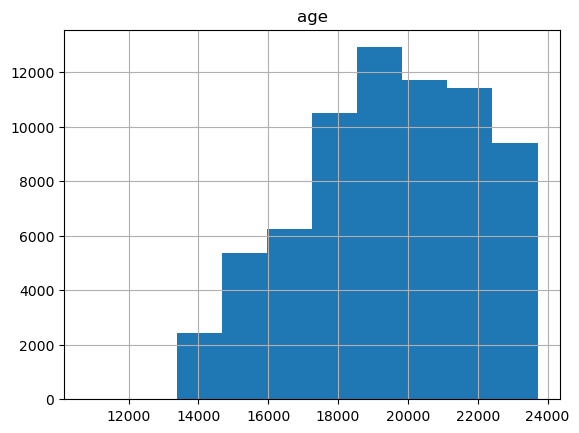

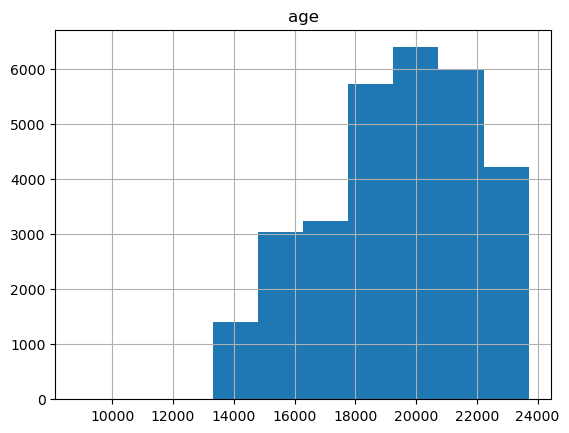

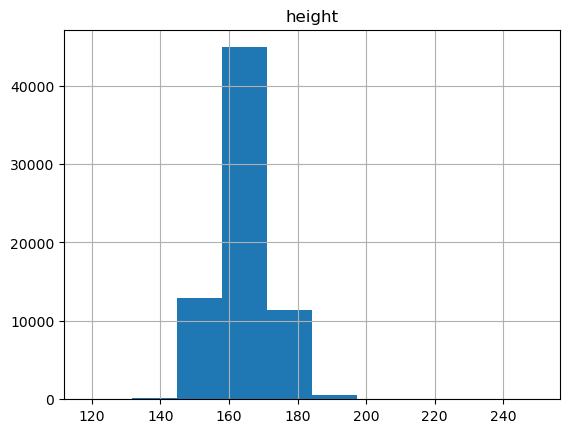

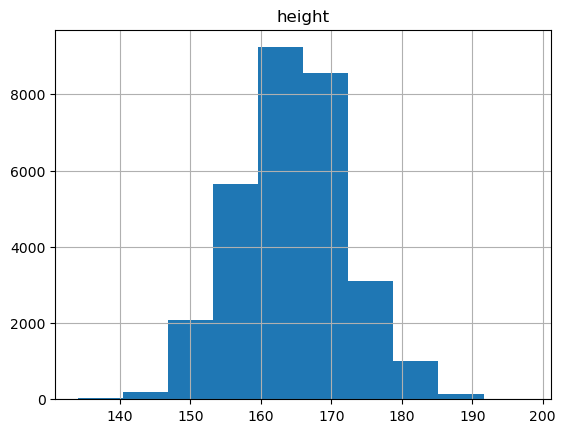

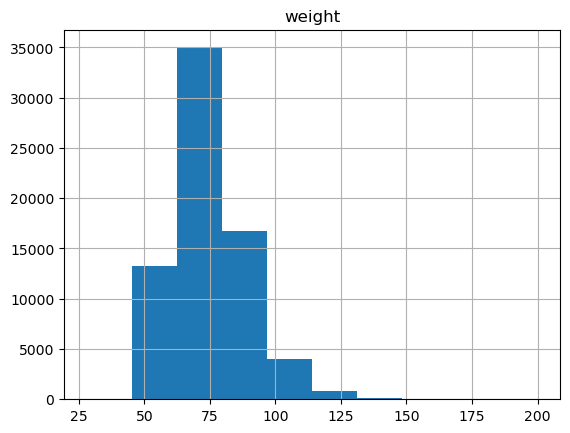

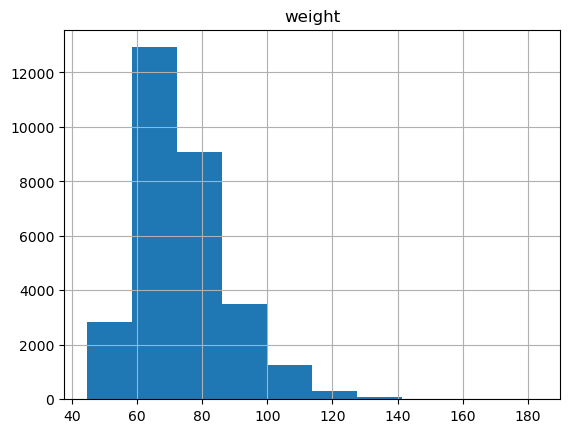

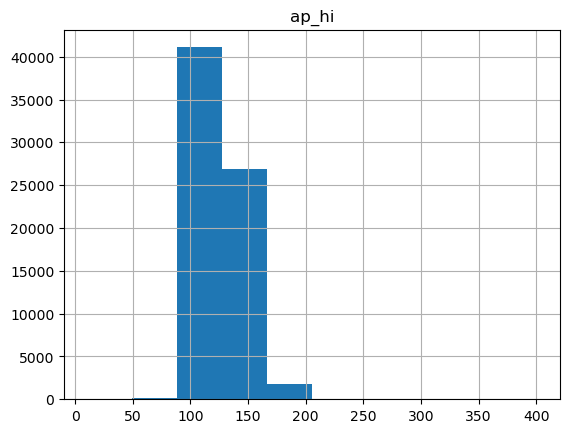

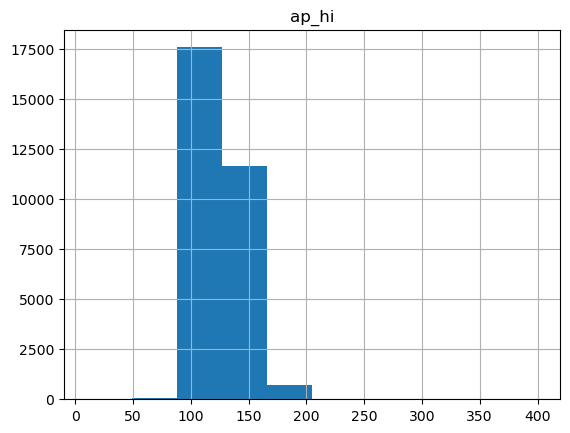

In [25]:
columns_to_hist = ['age','height','weight','ap_hi']

for col in columns_to_hist:
    for df in features:
        df.hist(column=col)
    

In [26]:
#features_test['age height	weight	ap_hi	ap_lo	']
# features_train = features_train[features_train['age']<23705]
# features_train = features_train[features_train['age']>12000]

# features_train = features_train[features_train['height']<198]
# features_train = features_train[features_train['height']>50]

# features_train = features_train[features_train['weight']<150]
# features_train = features_train[features_train['weight']>45]




# print(features_test['ap_lo'].max())
# print(features_test['ap_lo'].min())




# display(features_train)

In [27]:
categorical_variables = ['gender', 'cholesterol','gluc','smoke','alco','active']
for cat in categorical_variables:
    print(f'Уникальные значения по столбцу {cat}: {pd.unique(features_train[cat])}')

# def gender(g):
#     if g == 2:
#         return 1
#     if g == 1:
#         return 0
# features_train['gender'] = features_train['gender'].apply(gender)
# display(features_train)

Уникальные значения по столбцу gender: [2. 1.]
Уникальные значения по столбцу cholesterol: [1. 3. 2.]
Уникальные значения по столбцу gluc: [1. 2. 3.]
Уникальные значения по столбцу smoke: [0. 1.]
Уникальные значения по столбцу alco: [0. 1.]
Уникальные значения по столбцу active: [1. 0.]


## 4. Масштабирование признаков

### StandartScaler

In [28]:
# def onetwothree(i):
#     if i == 3:
#         return 2
#     if i == 2:
#         return 1
#     if i == 1:
#         return 0
# cols = ['cholesterol', 'gender', 'gluc']

# for col in cols:
#     features_train[col] = features_train[col].apply(onetwothree)



# features_train['age'] = features_train['age']/365
numeric = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436054,2.0,0.451638,-0.871115,-0.999022,-0.159302,1.0,1.0,0.0,0.0,1.0
1,0.307689,1.0,-1.081231,0.750213,0.757262,0.859832,3.0,1.0,0.0,0.0,1.0
2,-0.247990,1.0,0.068421,-0.730130,0.171834,-1.178436,3.0,1.0,0.0,0.0,0.0
3,-0.748142,2.0,0.579377,0.538735,1.342690,1.878966,1.0,1.0,0.0,0.0,1.0
4,-0.808533,1.0,-1.081231,-1.294070,-1.584450,-2.197571,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092757,2.0,0.451638,0.115780,-0.413594,-0.159302,1.0,1.0,1.0,0.0,1.0
69996,1.269489,1.0,-0.825753,3.640406,0.757262,0.859832,2.0,2.0,0.0,0.0,1.0
69997,-0.163280,2.0,2.367724,2.160063,3.098973,0.859832,3.0,1.0,0.0,1.0,0.0
69998,1.200586,1.0,-0.187057,-0.166190,0.464548,-0.159302,1.0,2.0,0.0,0.0,0.0


### MinMaxScaler

In [29]:
# def onetwothree(i):
#     if i == 3:
#         return 2
#     if i == 2:
#         return 1
#     if i == 1:
#         return 0
# cols = ['cholesterol', 'gender', 'gluc']

# for col in cols:
#     features_train[col] = features_train[col].apply(onetwothree)
    
# numeric = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit(features_train[numeric])
# features_train[numeric] = scaler.transform(features_train[numeric])
# features_test[numeric] = scaler.transform(features_test[numeric])
# display(features_train)

## Обучим модели

###  1 RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1100, num = 10)]
max_features = ['log2', 'sqrt']
criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(start = 15, stop = 30, num = 2)]
min_samples_split = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 10, stop = 40, num = 10)]
bootstrap = [True]
parameters = {'n_estimators': n_estimators,
              'criterion' : criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv = RandomizedSearchCV(model, 
                        parameters, 
                        n_iter = 100, 
                        scoring = 'f1',
                        cv = 5, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)



random_cv.fit(features_train,target_train)
random_cv.best_params_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Лучшие параметры для RandomForestClassifier()
{'n_estimators': 900,
 'min_samples_split': 34,
 'min_samples_leaf': 18,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': True}
 С метрикой auc_roc = 0.802362

In [ ]:
results = pd.DataFrame(random_cv.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
results = results.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
results.head(10)

### 2. GradientBoostingClassifier

In [ ]:
# model = GradientBoostingClassifier()

# loss = ['log_loss', 'deviance', 'exponential']
# n_estimators = [100, 500, 900, 1100, 1500]
# max_depth = [2, 3, 5, 10, 15]
# min_samples_leaf = [1, 2, 4, 6, 8]
# min_samples_split = [2, 4, 6, 10]
# max_features = ['auto', 'sqrt', 'log2', None]
# parameters = {'loss': loss,
#             'n_estimators': n_estimators,
#             'max_depth': max_depth,
#             'min_samples_leaf': min_samples_leaf,
#             'min_samples_split': min_samples_split,
#             'max_features': max_features}
# random_cv = RandomizedSearchCV(estimator=model,
#     param_distributions=parameters,
#     cv=5, n_iter=100, 
#     scoring = 'f1',
#     n_jobs = -1,
#     verbose = 1, 
#     return_train_score = True,
#     random_state=42)

# random_cv.fit(features_train,target_train)
# random_cv.best_params_

- Лучшие параметры: GradientBoostingClassifier с масштабированием MinMaxScaler: 
{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5,
 'loss': 'exponential'} с метрикой auc_roc: 0.802687
- Лучшие параметры: GradientBoostingClassifier с масштабированием StandartScaler: 
 {'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 5,
 'loss': 'deviance'} с метрикой auc_roc: 0.802882
 
 

In [ ]:
# results = pd.DataFrame(random_cv.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
# results = results.drop([
#             'mean_fit_time', 
#             'std_fit_time', 
#             'mean_score_time',
#             'std_score_time', 
#             'params', 
#             'split0_test_score', 
#             'split1_test_score', 
#             'split2_test_score', 
#             'std_test_score'],
#             axis=1)
# results.head(10)

## 3. LogisticRegression

In [ ]:
# model = linear_model.LogisticRegression()
# penalties = ['l1','l2','elasticnet','none']
# solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
# max_iters = [100,1000,2500]
# parameters = {'penalty':penalties,
#               'C' : np.logspace(-4,4,20),
#               'solver': solvers,
#               'max_iter' : max_iters
#              }

# random_cv = RandomizedSearchCV(estimator=model,
#     param_distributions=parameters,
#     cv=5,
#     scoring = 'f1',
#     n_jobs = -1,
#     verbose = 1, 
#     return_train_score = True,
#     random_state=42)

# random_cv.fit(features_train,target_train)
# random_cv.best_params_
        



- Лучшие параметры: LogisticRegression: {'solver': 'liblinear',
 'penalty': 'l1',
 'max_iter': 1000,
 'C': 78.47599703514607} с метрикой auc_roc: 0.782951

In [ ]:
# results = pd.DataFrame(random_cv.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
# results = results.drop([
#             'mean_fit_time', 
#             'std_fit_time', 
#             'mean_score_time',
#             'std_score_time', 
#             'params', 
#             'split0_test_score', 
#             'split1_test_score', 
#             'split2_test_score', 
#             'std_test_score'],
#             axis=1)
# results.head(10)

## 4. Лучшая модель

Найдем более точные гиперпараметры для лучшей модели

In [ ]:
# model = RandomForestClassifier()
# n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1100, num = 100)]
# max_features = ['sqrt']
# max_depth = [int(x) for x in np.linspace(start = 11, stop = 14, num = 1)]
# min_samples_split = [int(x) for x in np.linspace(start = 23, stop = 40, num = 4)]
# min_samples_leaf = [int(x) for x in np.linspace(start = 12, stop = 25, num = 3)]
# bootstrap = [True]
# parameters = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# random_cv = RandomizedSearchCV(model, 
#                         parameters, 
#                         n_iter = 50, 
#                         scoring = 'f1',
#                         cv = 5, 
#                         verbose = 1, 
#                         n_jobs=-1, 
#                         random_state=0)
# random_cv.fit(features_train,target_train)
# print(random_cv.best_params_)

# results = pd.DataFrame(random_cv.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
# results = results.drop([
#             'mean_fit_time', 
#             'std_fit_time', 
#             'mean_score_time',
#             'std_score_time', 
#             'params', 
#             'split0_test_score', 
#             'split1_test_score', 
#             'split2_test_score', 
#             'std_test_score'],
#             axis=1)


# results.head(10)

In [ ]:
# display(results)

0.725939
0.803021
---
RF
0.724698



In [ ]:
# {'n_estimators': 500,
#  'min_samples_split': 4,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 2,
#  'loss': 'exponential'}

# {'n_estimators': 655,
# 'min_samples_split': 39,
# 'min_samples_leaf': 34,
# 'max_features': 'log2',
# 'max_depth': 13,
# 'bootstrap': True}

#{'n_estimators': 900, 'min_samples_split': 34, 'min_samples_leaf': 18, 'max_features': 'sqrt', 'max_depth': 11, 'bootstrap': True}
# {'n_estimators': 100,
#  'min_samples_split': 50,
#  'min_samples_leaf': 39,
#  'max_features': 'sqrt',
#  'max_depth': 15,
#  'bootstrap': False}
# model = RandomForestClassifier(n_estimators = 655,
#                              min_samples_split = 39,
#                              min_samples_leaf = 34,
#                              max_features = 'log2',
#                              max_depth = 13,
#                              bootstrap = True,
#                             random_state = 0)
    
# model.fit(features_train,target_train)

# predictions = model.predict_proba(features_test)
# display(predictions)
# predictions = predictions[:,1]
# display(predictions)

In [ ]:
# id_test = pd.DataFrame(data=id_test)
# id_test['cardio'] = predictions
# display(id_test)

In [ ]:
# os.chdir('/kaggle/working/')
# id_test.to_csv('id_test.csv',index=False)